In [ ]:
#Configure your config.py on your local machine with your yelp and google API keys and add your config.py file to your .gitignore

In [3]:
import csv
import pandas as pd
import requests
import json
from config import gkey
from pprint import pprint

In [11]:
import gmaps

import numpy as np

import matplotlib.pyplot as plt

In [6]:
df_beer_reviews=pd.read_csv('Beer Data Groupby.csv', encoding = "ISO-8859-1")

In [10]:
df_beer_reviews.head()

,Unnamed: 0,beer_name,brewery_name,beer_style,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,0,! (Old Ale),NÃÂ¤rke Kulturbryggeri AB,Old Ale,10902.0,1.271638e+09,4.0,4.5,4.00,4.000000,4.5,8.2,57645.0
1,1,"""100""",The Covey Restaurant & Brewery,Belgian Dark Ale,13338.0,1.254407e+09,4.0,4.0,4.00,4.000000,4.4,10.0,49236.0
2,2,"""100"" Pale Ale",Aviator Brewing Company,American IPA,18635.0,1.245965e+09,4.0,4.0,3.50,4.000000,4.0,6.6,50696.0
3,3,"""12"" Belgian Golden Strong Ale",Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612.0,1.245585e+09,4.0,3.5,4.25,4.750000,4.5,9.0,44353.0
4,4,"""33"" Export",Baltika-Baku,Dortmunder / Export Lager,13640.0,1.200595e+09,3.0,3.0,3.00,3.166667,3.0,4.8,30080.0


In [7]:
#Sort by beer number of beers per style
beer = df_beer_reviews.groupby(["beer_name","brewery_name","beer_style"])
beer_cleaned = pd.DataFrame(beer.mean())
beer_cleaned= beer_cleaned.reset_index()
beer_type=beer_cleaned.groupby(['beer_style'])
beer_type_df=pd.DataFrame(beer_type.count())
beer_type_df=beer_type_df.sort_values(['beer_name'], ascending=False)
beer_type_df

,beer_name,brewery_name,Unnamed: 0,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_style,,,,,,,,,,,,
American IPA,3588,3588,3588,3588,3588,3588,3588,3588,3588,3588,2490,3588
American Pale Ale (APA),3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,2175,3320
American Amber / Red Ale,2489,2489,2489,2489,2489,2489,2489,2489,2489,2489,1587,2489
American Porter,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,1356,2181
Fruit / Vegetable Beer,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833,1225,1833
Hefeweizen,1713,1713,1713,1713,1713,1713,1713,1713,1713,1713,1191,1713
American Double / Imperial IPA,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1294,1546
English Bitter,1486,1486,1486,1486,1486,1486,1486,1486,1486,1486,1321,1486
Euro Pale Lager,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1345,1479


In [12]:
# Show only the top 10 beer styles
beer_type_df=beer_type_df.drop(beer_type_df.index[10:])
beer_type_df=beer_type_df.sort_values(["review_overall"],ascending=True)
beer_type_df.head(11)

,beer_name,brewery_name,Unnamed: 0,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_style,,,,,,,,,,,,
American Stout,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,837,1418
Euro Pale Lager,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1345,1479
English Bitter,1486,1486,1486,1486,1486,1486,1486,1486,1486,1486,1321,1486
American Double / Imperial IPA,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1294,1546
Hefeweizen,1713,1713,1713,1713,1713,1713,1713,1713,1713,1713,1191,1713
Fruit / Vegetable Beer,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833,1225,1833
American Porter,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,1356,2181
American Amber / Red Ale,2489,2489,2489,2489,2489,2489,2489,2489,2489,2489,1587,2489
American Pale Ale (APA),3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,2175,3320


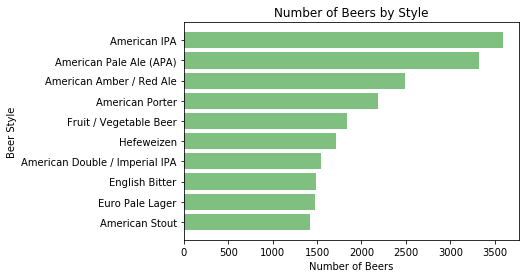

In [13]:
# Ploting the Top 10 beer styles
plt.barh(beer_type_df.index,beer_type_df['beer_name'] ,align='center', alpha=0.5, color="g")
plt.ylabel("Beer Style")
plt.xlabel("Number of Beers")
plt.title("Number of Beers by Style")
plt.savefig("Number of Beers by Style.png",bbox_inches="tight")

In [14]:
beer_review_style = df_beer_reviews.groupby(['beer_style']).count()
beer_review_style = beer_review_style[['review_overall']]
beer_review_style = beer_review_style.sort_values(["review_overall"],ascending=False)
beer_review_style = beer_review_style.reset_index()
beer_review_style.head()

,beer_style,review_overall
0,American IPA,3588
1,American Pale Ale (APA),3320
2,American Amber / Red Ale,2489
3,American Porter,2181
4,Fruit / Vegetable Beer,1833


In [ ]:
# top_beer_style=beer_review_style.loc[0:9,:]
# top_beer_style.head(11)

In [15]:
# Show only the top 10 beer styles
beer_review_style=beer_review_style.drop(beer_review_style.index[10:])
beer_review_style=beer_review_style.sort_values(["review_overall"],ascending=True)
beer_review_style.head(11)

,beer_style,review_overall
9,American Stout,1418
8,Euro Pale Lager,1479
7,English Bitter,1486
6,American Double / Imperial IPA,1546
5,Hefeweizen,1713
4,Fruit / Vegetable Beer,1833
3,American Porter,2181
2,American Amber / Red Ale,2489
1,American Pale Ale (APA),3320
0,American IPA,3588


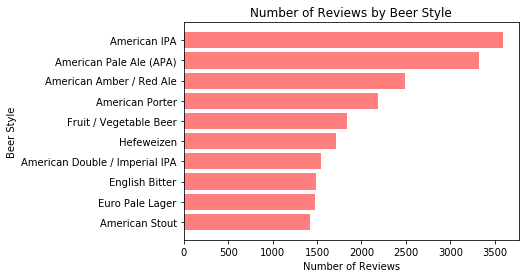

In [16]:
# 
plt.barh(beer_review_style['beer_style'], beer_review_style['review_overall'],align='center', alpha=0.5, color="r")
plt.ylabel("Beer Style")
plt.xlabel("Number of Reviews")
plt.title("Number of Reviews by Beer Style")
plt.savefig("Number of Reviews by Beer Style.png",bbox_inches="tight")

In [6]:
style_means=df_beer_reviews.groupby(['beer_style']).review_overall.mean()
df_style_means = pd.DataFrame(style_means)

df_style_means.head()

,review_overall
beer_style,
Altbier,3.824054
American Adjunct Lager,3.001659
American Amber / Red Ale,3.781010
American Amber / Red Lager,3.564601
American Barleywine,3.896756


In [7]:
df_style_means=df_style_means.sort_values(["review_overall"],ascending=False)
df_style_means=df_style_means.drop(df_style_means.index[10:])
df_style_means.head(50)

,review_overall
beer_style,
American Wild Ale,4.093262
Gueuze,4.086287
Quadrupel (Quad),4.071630
Lambic - Unblended,4.048923
American Double / Imperial Stout,4.029820
Russian Imperial Stout,4.023084
Weizenbock,4.007969
American Double / Imperial IPA,3.998017
Flanders Red Ale,3.992722


In [8]:
df_style_means=df_style_means.sort_values(["review_overall"],ascending=True)
df_style_means

,review_overall
beer_style,
Rye Beer,3.981737
Flanders Red Ale,3.992722
American Double / Imperial IPA,3.998017
Weizenbock,4.007969
Russian Imperial Stout,4.023084
American Double / Imperial Stout,4.029820
Lambic - Unblended,4.048923
Quadrupel (Quad),4.071630
Gueuze,4.086287


In [24]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(rect.get_x() + rect.get_height()/2., 1.05*width,
                '%d' % int(width),
                ha='center', va='bottom')

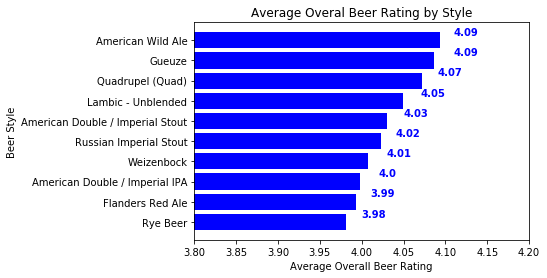

In [36]:
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
fig, ax = plt.subplots()
bar_label=round(df_style_means['review_overall'],2)
bar_style_means=plt.barh(df_style_means.index,df_style_means['review_overall'],align='center', color="b",)
plt.xlim(3.8,4.2)
plt.ylabel("Beer Style")
plt.xlabel("Average Overall Beer Rating")
plt.title("Average Overal Beer Rating by Style")
plt.savefig("Average Overal Beer Rating by Style.png",bbox_inches="tight")
for i, v in enumerate(bar_label):
    ax.text(v + .02, i + .25, str(v), color='blue', fontweight='bold')

In [18]:
beer_count = df_beer_reviews.groupby(['beer_name']).count()
beer_count = beer_count[['review_overall']]
beer_count = beer_count.reset_index()
beer_count 

,beer_name,review_overall
0,! (Old Ale),1
1,"""100""",5
2,"""100"" Pale Ale",1
3,"""12"" Belgian Golden Strong Ale",2
4,"""33"" Export",3
5,"""4"" Horse Oatmeal Stout",2
6,"""400"" Ale",18
7,"""50"" Golden Anniversary Lager",1
8,"""76"" Anniversary Ale",3
9,"""76"" Anniversary Ale With English Hops",1


In [ ]:
beer_df=pd.DataFrame(beer.mean())
beer_df=beer_df.reset_index()

beer_merged_data = pd.merge(beer_df, beer_count, on='beer_name', how='outer')
beer_merged_data = beer_merged_data.rename(columns={'review_overall_x': 'average_review', 'review_overall_y': 'review_count'})
beer_merged_data.head()

In [ ]:
beer_sorted_data = beer_merged_data.sort_values('review_count', ascending=False)
beer_sorted_data.head()

In [ ]:
bins = [0, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
review_count_slices = ['1', '2', '3', '4-5', '6-8', '9-13', '14-21', '22-34', '35-55', '56-89', '90-144', '145-233', '234-377', '378-610', '611-987', '988-1597', '1598-2584', '2585 and up']
beer_sorted_data['review_count_slices'] = pd.cut(beer_sorted_data['review_count'], bins, labels=review_count_slices)
beer_sorted_data.head()

In [ ]:
review_1 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '1', :]
review_1_count = review_1['review_count'].count()
review_2 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '2', :]
review_2_count = review_2['review_count'].count()
review_3 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '3', :]
review_3_count = review_3['review_count'].count()
review_4_5 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '4-5', :]
review_4_5_count = review_4_5['review_count'].count()
review_6_8 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '6-8', :]
review_6_8_count = review_6_8['review_count'].count()
review_9_13 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '9-13', :]
review_9_13_count = review_9_13['review_count'].count()
review_14_21 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '14-21', :]
review_14_21_count = review_14_21['review_count'].count()
review_22_34 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '22-34', :]
review_22_34_count = review_22_34['review_count'].count()
review_35_55 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '35-55', :]
review_35_55_count = review_35_55['review_count'].count()
review_56_89 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '56-89', :]
review_56_89_count = review_56_89['review_count'].count()
review_90_144 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '90-144', :]
review_90_144_count = review_90_144['review_count'].count()
review_145_233 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '145-233', :]
review_145_233_count = review_145_233['review_count'].count()
review_234_377 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '234-377', :]
review_234_377_count = review_234_377['review_count'].count()
review_378_610 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '378-610', :]
review_378_610_count = review_378_610['review_count'].count()
review_611_987 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '611-987', :]
review_611_987_count = review_611_987['review_count'].count()
review_988_1597 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '988-1597', :]
review_988_1597_count = review_988_1597['review_count'].count()
review_1598_2584 = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '1598-2584', :]
review_1598_2594_count = review_1598_2584['review_count'].count()
review_2585_andup = beer_sorted_data.loc[beer_sorted_data["review_count_slices"] == '2585 and up', :]
review_2585_andup_count = review_2585_andup['review_count'].count()



review_count_df = pd.DataFrame({'review_count': [review_1_count, review_2_count, review_3_count, review_4_5_count, review_6_8_count, review_9_13_count, review_14_21_count, review_22_34_count, review_35_55_count, review_56_89_count, review_90_144_count, review_145_233_count, review_234_377_count, review_378_610_count, review_611_987_count, review_988_1597_count, review_1598_2594_count, review_2585_andup_count]})
review_count_df = review_count_df.rename(index={0 : '1', 1 : '2', 2 : '3', 3 : '4-5', 4 : '6-8', 5 : '9-13', 6 : '14-21', 7 : '22-34', 8 : '35-55',
                                                9: '56-89', 10: '90-144', 11: '145-233', 12: '234-377', 13: '378-610', 14: '611-987', 15: '988-1597', 16: '1598-2584', 17: '2585 and up'})
review_count_df

In [ ]:
top_list = list(review_2585_andup['brewery_name'])
len(top_list), top_list

review_2585_andup['brewery_name'].value_counts()

In [ ]:
top_set = set(top_list)
len(top_set), top_set

In [ ]:
#url = "https://api.yelp.com/v3/businesses/search?term="

#top_response = requests.get(url + "Sierra Nevada")
#top_response


In [ ]:




API_HOST = 'https://api.yelp.com'
BUSINESS_PATH = '/v3/businesses/'
def get_business(business_id):
    business_path = BUSINESS_PATH + business_id
    url = API_HOST + business_path + '/reviews'
    headers = {'Authorization': f"Bearer {API_KEY}"}

    response = requests.get(url, headers=headers)

    return response.json()
results = get_business('la-taqueria-san-francisco-2')
pprint(results)

In [ ]:
API_HOST = 'https://api.yelp.com'
BUSINESS_PATH = '/v3/businesses/'
def get_business(business_id):
    business_path = BUSINESS_PATH + business_id
    url = API_HOST + business_path
    headers = {'Authorization': f"Bearer {API_KEY}"}

    response = requests.get(url, headers=headers)

    return response.json()
results = get_business('la-taqueria-san-francisco-2')
pprint(results)

In [ ]:
term = "Stone Brewing"
location = "escondido"
SEARCH_LIMIT = 3
category = "breweries"
sort = "review_count"

url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT,
        'categories': category,
        'sort_by': sort
    }
    
API_HOST = 'https://api.yelp.com'
BUSINESS_PATH = '/v3/businesses/search'

business_path = BUSINESS_PATH
url = API_HOST + business_path
headers = {'Authorization': f"Bearer {API_KEY}"}

response = requests.get(url, headers=headers, params=url_params)

results = response.json()

pprint(results)

In [ ]:
brewery = "alpha brewing"
put = "textquery"
field = ["id", "name", "rating", "geometry/location"]
base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
params = {
    "input": brewery,
    "key": gkey,
    "inputtype": put,
    "fields": ["name", "id"]
}
google_response = requests.get(base_url, params=params)
print(response.url)

In [ ]:
brewery = "climax brewing company"
put = "textquery"
field = "id,name,rating,geometry/location"
base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
params = {
    "input": brewery,
    "key": gkey,
    "inputtype": put,
    "fields": field
}
google_response = requests.get(base_url, params=params)
print(response.url)

In [ ]:
places_data = google_response.json()

pprint(places_data)
#print(json.dumps(places_data, indent=4, sort_keys=True))

In [ ]:
latitude = places_data['candidates'][0]['geometry']['location']['lat']
longitude = places_data['candidates'][0]['geometry']['location']['lng']
name = places_data['candidates'][0]['name']
latitude, longitude, name

In [ ]:


SEARCH_LIMIT = 1
category = "breweries"
sort = "distance"

url_params = {
        'longitude': longitude,
        'latitude': latitude,
        'limit': SEARCH_LIMIT,
        'categories': category,
        'sort_by': sort
    }
    
API_HOST = 'https://api.yelp.com'
BUSINESS_PATH = '/v3/businesses/search'

business_path = BUSINESS_PATH
url = API_HOST + business_path
headers = {'Authorization': f"Bearer {API_KEY}"}
yelp_response = requests.get(url, headers=headers, params=url_params)
print(yelp_response.url)

In [ ]:



yelp_results = yelp_response.json()

pprint(results)

In [ ]:
name = yelp_results['businesses'][0]['name']
rating = yelp_results['businesses'][0]['rating']
review_count = yelp_results['businesses'][0]['review_count']
name, rating, review_count

In [ ]:
top_set

In [ ]:
 
                                
field = "id,name,rating,geometry/location"
base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
lat_list = []
lng_list = []
brew_list = []

response_list = []
for brewery in top_set:
    params = {
    "input": brewery,
    "key": gkey,
    "inputtype": put,
    "fields": field
}
    print(f"Making request for {brewery}")
    top_response = requests.get(base_url, params=params)
    result = top_response.json()
    response_list.append(top_response.json())
    
    try:
        lat_list.append(result['candidates'][0]['geometry']['location']['lat'])
        lng_list.append(result['candidates'][0]['geometry']['location']['lng'])
        brew_list.append(result['candidates'][0]['name'])
    except:
        print(f"no result for{brewery}")
    



In [ ]:
lat_list, lng_list, brew_list

In [ ]:
response_list

In [ ]:
response_df = pd.DataFrame(response_list)
response_df.head()

In [ ]:
response_df.to_csv('top_set_response.csv')

In [ ]:
beer_df = pd.read_csv('top_set_response.csv')
beer_df.head()
# beer_df.to_csv('Beer Data Groupby.csv')

In [ ]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Customize the size of the figure
figure_layout = {
    'width': '500px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [ ]:
# Create a Brewery location Heatmap
fig = gmaps.figure()
# Assign the marker layer to a variable
markers = gmaps.marker_layer(beer_df[])
# Add the layer to the map
fig.add_layer(markers)
fig